# Header for Software License

                                                         
Copyright (C) 2014, Institute for Defense Analyses             
4850 Mark Center Drive, Alexandria, VA; 703-845-2500           
This material may be reproduced by or for the US Government    
pursuant to the copyright license under the clauses at DFARS   
252.227-7013 and 252.227-7014.                                 
                                                               
LARC : Linear Algebra via Recursive Compression                
Authors:                                                       
   * Steve Cuccaro (IDA-CCS)                                    
   * John Daly (LPS)                                            
   * John Gilbert (UCSB, IDA adjunct)                           
   * Jenny Zito (IDA-CCS)                                       
                                                               
Additional contributors are listed in "LARCcontributors".      
                                                               
Questions: larc@super.org                                      
                                                                
All rights reserved.                                       
                                                           
Redistribution and use in source and binary forms, with or  
without modification, are permitted provided that the
following conditions are met:                          
  * Redistribution of source code must retain the above copyright notice, this list of conditions and the following disclaimer. 
  *  Redistribution in binary form must reproduce the above  copyright notice, this list of conditions and the  following disclaimer in the documentation and/or other  materials provided with the distribution.  
  * Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission. 

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, 
INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.  IN NO EVENT SHALL THE COPYRIGHT HOLDER NOR 
CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; 
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, 
STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR  OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

## Warning!!!

**Due to how Jupyter I/O is implemented, any printout originating from the LARC C code will be directed to the Jupyter console window (i.e., the terminal window that you typed "jupyter notebook" in), instead of in the notebook cell itself.**

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

###########################################################
######### Toss numballs balls into numbins bins ###########
###########################################################
## WARNING!   Note the numbers for rsc 12 12 are too big for histogram
# numbins = 1073741824  # 2^{30}
# numballs =  28500000

numbins = 1073741824
numballs = 1922527
# numballs = 1090000000
print("The number of bins  is %d" %numbins)
print("The number of balls is %d" %numballs)

######################################################################
######  Theoretical Calculation of expected number of empty bins  ####
######################################################################
## After a single toss, for a particular bin, 
##     the probability that it has content or is empty
baseprobin = 1.0/numbins
baseprobempty = (1-baseprobin)
print("The prob that a single toss puts a ball in a particular bin is %g" %baseprobin)
print("The prob that a single toss leaves a particular bin empty is %g" %baseprobempty)

## After numball tosses, the probability that the particular bin is empty is
probempty = pow(baseprobempty,numballs)
print("The prob that %d tosses leaves a particular bin empty is %g" %(numballs,probempty))

## The expected number of empty bins after numballs tosses
expectedemptybins = probempty * numbins
print("After %d tosses into %d bins, the expected number of empty bins is %d" %(numballs,numbins,expectedemptybins))
print("which is %g percent of the bins" %(100 * expectedemptybins/numbins))


## The probability that a particular bin has exactly one ball after numballs tosses
thisbinhas1 = baseprobin * (pow(baseprobempty, numballs-1)) * numballs
expectedwith1 = numbins * thisbinhas1
print("And we expect %d bins to have exactly one ball" %expectedwith1)
                    
## The number of bins that have at least one ball is
expectedOccupiedBins = numbins - expectedemptybins
print("The expected number of bins with at least one ball is %d" %expectedOccupiedBins)

The number of bins  is 1073741824
The number of balls is 1922527
The prob that a single toss puts a ball in a particular bin is 9.31323e-10
The prob that a single toss leaves a particular bin empty is 1
The prob that 1922527 tosses leaves a particular bin empty is 0.998211
After 1922527 tosses into 1073741824 bins, the expected number of empty bins is 1071821017
which is 99.8211 percent of the bins
And we expect 1919087 bins to have exactly one ball
The expected number of bins with at least one ball is 1920806


Carrying out Monte Carlo with 285000 balls and 1073741 bins
The number of empty bins is 823432


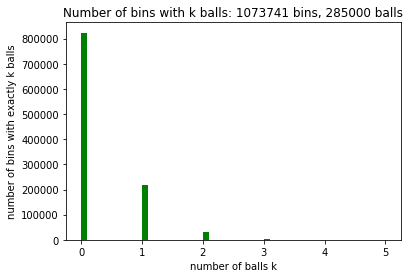

In [2]:
####   WARNING   ####
   
## Note the numbers for rsc 12 12 are too big, they stall the desktop
# numbins = 1073741824  # 2^{30}
# numballs =  28500000
numbins = 1073741 
numballs = 285000

###########################################################################
######  Monte Carlo the number of empty bins and bins with 1 ball  ########
###########################################################################
print("Carrying out Monte Carlo with %d balls and %d bins" %(numballs, numbins))

## first get a list numballs real numbers each between 0 and numbins
realballpositions = numbins*np.random.rand(numballs)

## calculate the count of balls in each bin
bincount = np.zeros(numbins)
for rbp in realballpositions:
    i = int(rbp)
    bincount[i] = bincount[i] + 1;
    
## count the number of empty bins
numempty = 0
for bin in range(numbins):
    if (bincount[bin] == 0):
        numempty = numempty + 1
print("The number of empty bins is %d" %numempty)
        
# the histogram of the data
n, histbins, patches = plt.hist(bincount, 50, facecolor='green')

plt.xlabel('number of balls k')
plt.ylabel('number of bins with exactly k balls')
stringtitle = 'Number of bins with k balls: %d bins, %d balls' %(numbins,numballs)
plt.title(stringtitle)
#  plt.axis([40,160, 0, 0.03])
# plt.grid(True)

plt.show()